In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib
print(matplotlib.__version__)

3.7.1


In [4]:
from keras.datasets import mnist

2023-05-05 15:46:13.773372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
x_train[9487].shape

(28, 28)

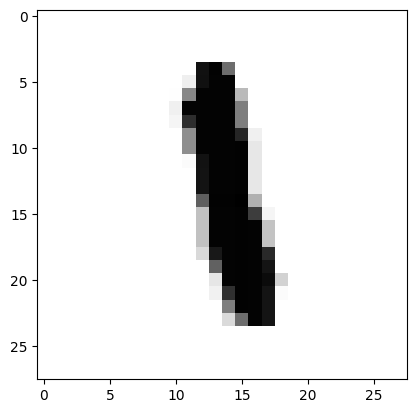

In [9]:
plt.imshow(x_train[9487], cmap='Greys')

In [10]:
y_train[9487]

1

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [18]:
model = Sequential()

In [19]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

In [20]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [21]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='mse', optimizer=SGD(learning_rate=0.1), 
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 activation (Activation)     (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 activation_1 (Activation)   (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trai

In [24]:
model.fit(x_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0873 - accuracy: 0.2594
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0779 - accuracy: 0.4103
Epoch 3/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0676 - accuracy: 0.5602
Epoch 4/20
300/300 [==============================] - 3s 8ms/step - loss: 0.0576 - accuracy: 0.6798
Epoch 5/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0486 - accuracy: 0.7441
Epoch 6/20
300/300 [==============================] - 2s 8ms/step - loss: 0.0411 - accuracy: 0.7909
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0351 - accuracy: 0.8286
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0304 - accuracy: 0.8541
Epoch 9/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0269 - accuracy: 0.8682
Epoch 10/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0242 - accuracy: 0.8788

In [25]:
from ipywidgets import interact_manual

In [26]:
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [32]:
def test(testing_number):
    plt.imshow(x_test[testing_number].reshape(28, 28), cmap="Greys")
    print("The number should be：", predict[testing_number])

In [35]:
interact_manual(test, testing_number = (0, 9999));

interactive(children=(IntSlider(value=4999, description='testing_number', max=9999), Button(description='Run I…

In [36]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')